# Preparation of 27 Al NMR Figures

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure, show

In [38]:
# Enable inline plotting with matplotlib
%matplotlib inline

## Import data

In [39]:
# Declare the data path to be imported.
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"

# Load the *.csv as a pandas dataframe.
AlNMRData = pd.read_csv(data_path)

# Build some derivative columns for ease of use.
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]
AlNMRData['OH_Al_ratio'] = AlNMRData["OH_concentration"] / AlNMRData["Al_concentration"]

## View imported data

In [40]:
# Examine the column names and first few values of the dataframe.
AlNMRData.head()

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.0,80.45,Na+,25,0.005000,200.0
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0


## Demo Whisker Plot
With all options listed.

### Nature of the whisker plots
From the `matplotlib` documentation:

> The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

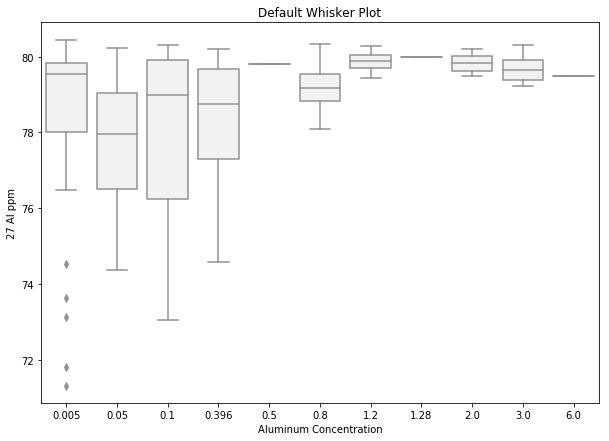

In [43]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes, this is
# not necessary in normal use, and is done for my reference.
boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue=None,
    data=AlNMRData,
    order=None,
    hue_order=None,
    orient=None,
    color='0.95',
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    notch=False,
    ax=ax,
)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Default Whisker Plot')
boxplot_ax.set_xlabel('Aluminum Concentration')
boxplot_ax.set_ylabel('27 Al ppm')

# Call the matplotlib show method.
show()

### Nature of the Swarm Plot (Beeswarm)

> Draw a categorical scatterplot with non-overlapping points.

> This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

This plot can be overlapped with the above whisker plot to allow for individual points to be shown.

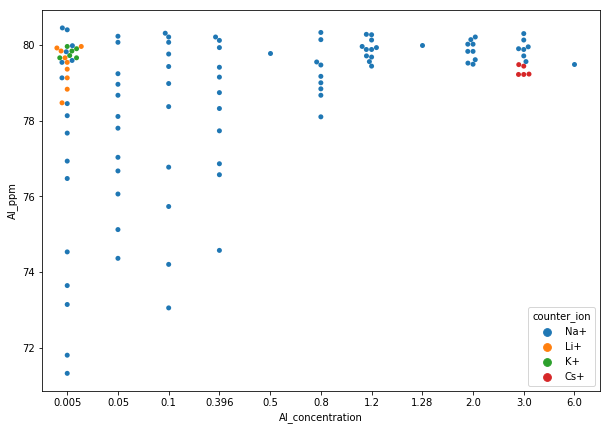

In [52]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes.
boxplot_ax = sns.swarmplot(
    x="Al_concentration",
    y="Al_ppm",
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
)

## Aluminum Concentration Whisker Plots

### Aluminum Concentration by Counter Ion

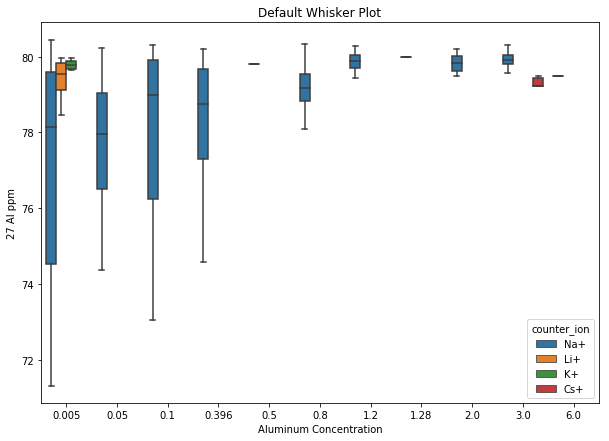

In [62]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes, this is
# not necessary in normal use, and is done for my reference.
boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Default Whisker Plot')
boxplot_ax.set_xlabel('Aluminum Concentration')
boxplot_ax.set_ylabel('27 Al ppm')

# Call the matplotlib show method.
show()

### Aluminum Concentration by Counter Ion with Swarm

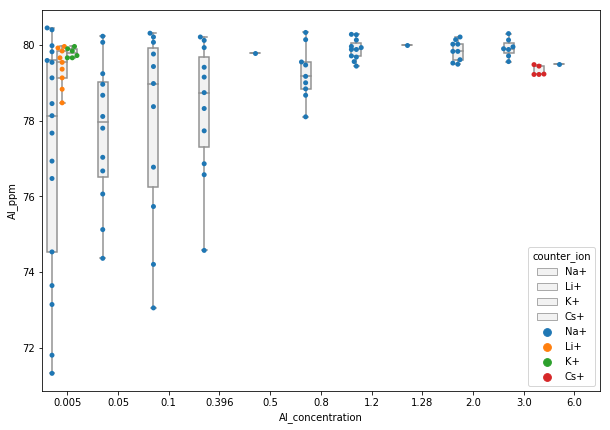

In [64]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

boxplot_ax = sns.swarmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue='counter_ion',
    dodge=True,
    color=None,
    ax=ax,
)

boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
    color='0.95',
)

ax.legend_.remove()

## Hydroxide Concentration Whisker Plots